In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.interpolate import lagrange
from numpy.polynomial.polynomial import Polynomial

In [2]:
def mean_squared_error(y_true,y_pred):
    assert len(y_true)==len(y_pred)
    
    diff = np.average(np.square(y_true-y_pred),axis=0)
    return np.sqrt(diff)

In [3]:
a,b = 0, 4*np.pi

## Making the training set

In [4]:
x = np.random.uniform(a,b,size=100)
y = np.sin(x)

#### Plotting the training set

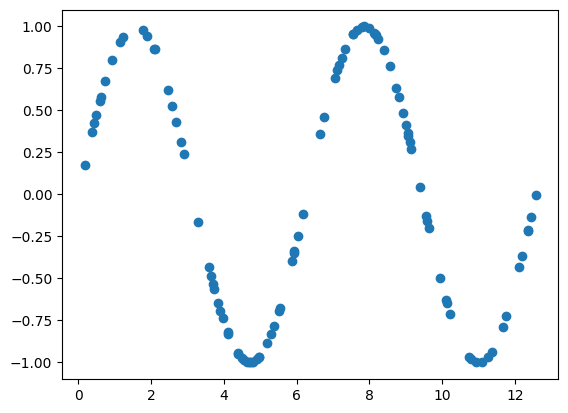

In [5]:
plt.scatter(x,y)
plt.show()

#### Training on full training set

In [6]:
poly = lagrange(x,y)
interpolator = Polynomial(poly.coef[::-1])

y_train_pred = interpolator(x)
error = mean_squared_error(y,y_train_pred)

print(f"Mean Square Error on training set when training on 100 points {error}")

Mean Square Error on training set when training on 100 points 1.5766722390987763e+79


#### Training on limited training set

Mean Square Error on training set when training on random 17 points 0.0018757031467273272


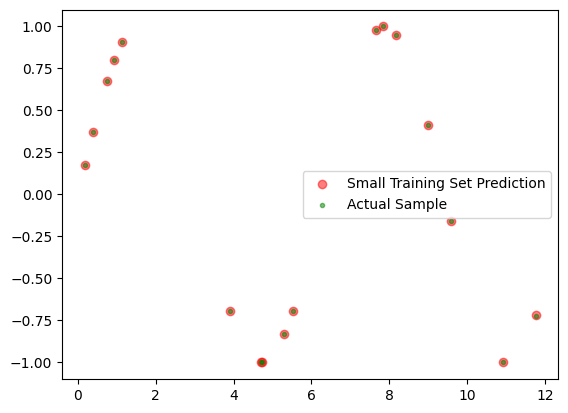

In [8]:
samples = np.random.choice(np.arange(len(x)),size=17,replace=False)
x_train_small = x[samples]
y_train_small = y[samples]

poly = lagrange(x_train_small,y_train_small)
interpolator_small = Polynomial(poly.coef[::-1])

y_train_small_pred = interpolator_small(x_train_small)
error = mean_squared_error(y_train_small,y_train_small_pred)

print(f"Mean Square Error on training set when training on random 17 points {error}")

plt.scatter(x_train_small, y_train_small_pred, label="Small Training Set Prediction", c='red', alpha=0.5)
plt.scatter(x_train_small, y_train_small, label="Actual Sample", c='green', alpha=0.5, marker='.')
plt.legend()
plt.show()

### Testing

In [9]:
x_test = np.random.uniform(a,b,size=100)
y_test = np.sin(x_test)

y_test_pred = interpolator(x_test)
error = mean_squared_error(y_test,y_test_pred)

print(f"Mean Square Error on new test set when training on 100 points {error}")

y_test_small_pred = interpolator_small(x_test)
error = mean_squared_error(y_test,y_test_small_pred)

print(f"Mean Square Error on new test set when training on 17 points {error}")

Mean Square Error on new test set when training on 100 points 1.0593457476296704e+79
Mean Square Error on new test set when training on 17 points 0.0019934293184367246


### Adding noise to the training sample

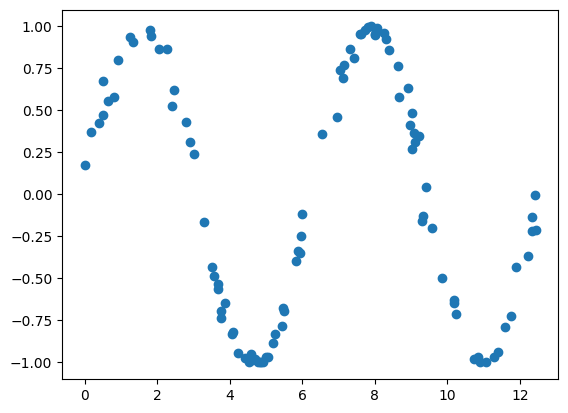

In [10]:
noise = np.random.normal(loc=0,scale=0.1,size=100)
x_noisy = x+noise
y_noisy = y

plt.scatter(x_noisy,y_noisy)
plt.show()

#### Training with full training set

In [11]:
poly = lagrange(x_noisy,y_noisy)
interpolator_noisy = Polynomial(poly.coef[::-1])

y_noisy_pred = interpolator_noisy(x_noisy)
error = mean_squared_error(y_noisy,y_noisy_pred)
print(f"Mean Square Error on training set when training on 100 points with noise {error}")

Mean Square Error on training set when training on 100 points with noise 3.2655934512788377e+78


#### Training with limited samples

Mean Square Error on training set when training on random 17 points 0.005317032628609458


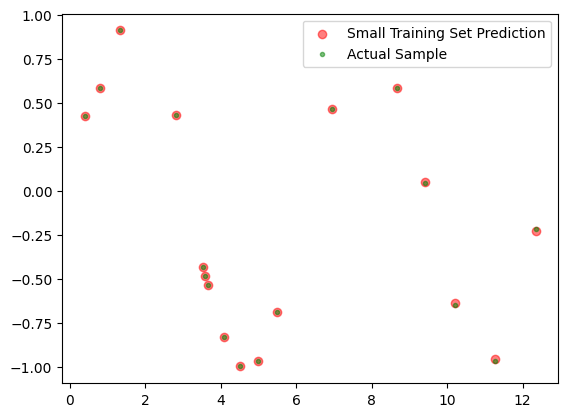

In [12]:
samples = np.random.choice(np.arange(len(x_noisy)),size=17,replace=False)
x_noisy_small = x_noisy[samples]
y_noisy_small = y_noisy[samples]

poly = lagrange(x_noisy_small,y_noisy_small)
interpolator_small_noisy = Polynomial(poly.coef[::-1])

y_noisy_small_pred = interpolator_small_noisy(x_noisy_small)
error = mean_squared_error(y_noisy_small, y_noisy_small_pred)

print(f"Mean Square Error on training set when training on random 17 points {error}")

plt.scatter(x_noisy_small, y_noisy_small_pred, label="Small Training Set Prediction", c='red', alpha=0.5)
plt.scatter(x_noisy_small, y_noisy_small, label="Actual Sample", c='green', alpha=0.5, marker='.')
plt.legend()
plt.show()

#### Testing

In [13]:
x_test = np.random.uniform(a,b,size=100)
y_test = np.sin(x_test)

y_test_pred = interpolator_noisy(x_test)
error = mean_squared_error(y_test,y_test_pred)

print(f"Mean Square Error on new test set when training on 100 points {error}")

y_test_small_pred = interpolator_small_noisy(x_test)
error = mean_squared_error(y_test,y_test_small_pred)

print(f"Mean Square Error on new test set when training on 17 points {error}")

Mean Square Error on new test set when training on 100 points 3.759059245987153e+78
Mean Square Error on new test set when training on 17 points 93577.17205550104


#### Trying multiple values of $\epsilon$

In [15]:
eps = [10**i for i in range(-3,3)]
x_test = np.random.uniform(a,b,size=100)
y_test = np.sin(x_test)
for ep in eps:
    print(f"For standard deviation = {ep}: ")
    noise = np.random.normal(loc=0,scale=ep,size=100)
    x_noisy = x+noise
    y_noisy = y
    # plt.scatter(x_noisy,y_noisy)
    # plt.show()

    poly = lagrange(x_noisy,y_noisy)
    interpolator_noisy = Polynomial(poly.coef[::-1])

    y_noisy_pred = interpolator_noisy(x_noisy)
    error = mean_squared_error(y_noisy,y_noisy_pred)
    print(f"Mean Square Error on training set when training on 100 points with noise {error}")

    samples = np.random.choice(np.arange(len(x_noisy)), size=17, replace=False)
    x_noisy_small = x_noisy[samples]
    y_noisy_small = y_noisy[samples]

    poly = lagrange(x_noisy_small,y_noisy_small)
    interpolator_small_noisy = Polynomial(poly.coef[::-1])

    y_noisy_small_pred = interpolator_small_noisy(x_noisy_small)
    error = mean_squared_error(y_noisy_small, y_noisy_small_pred)

    print(f"Mean Square Error on training set when training on random 17 points {error}")

    y_test_pred = interpolator_noisy(x_test)
    error = mean_squared_error(y_test,y_test_pred)
    # plt.scatter(x_test,y_test)
    # plt.scatter(x_test,y_test_pred)
    # plt.show()

    print(f"Mean Square Error on new test set when training on 100 points {error}")

    y_test_small_pred = interpolator_small_noisy(x_test)
    error = mean_squared_error(y_test,y_test_small_pred)
    # plt.scatter(x_test,y_test)
    # plt.scatter(x_test,y_test_small_pred)
    # plt.show()

    print(f"Mean Square Error on new test set when training on 17 points {error}")
    print()

For standard deviation = 0.001: 
Mean Square Error on training set when training on 100 points with noise 1.8365564104722783e+78
Mean Square Error on training set when training on random 17 points 0.0017534550339911136
Mean Square Error on new test set when training on 100 points 2.5217694749499854e+77
Mean Square Error on new test set when training on 17 points 442.47578029112464

For standard deviation = 0.01: 
Mean Square Error on training set when training on 100 points with noise 1.0035459696980585e+78
Mean Square Error on training set when training on random 17 points 0.006153352371931724
Mean Square Error on new test set when training on 100 points 1.1143393312437727e+77
Mean Square Error on new test set when training on 17 points 110962.58214447243

For standard deviation = 0.1: 
Mean Square Error on training set when training on 100 points with noise 6.6639925790218e+78
Mean Square Error on training set when training on random 17 points 0.2541685916360651
Mean Square Error on 